In [1]:
import io
import base64
from IPython.display import display, HTML, clear_output
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Helper Functions

# Open Video Controller
# Only support file formats that HTML5 <video> playback supports(mp4, ogg, WebM).
def open_video_controller(fpath, width = 480, height = 360):
    display(HTML(data='''<video alt="test" width="'''+ str(width) + '''" height="''' + str(height) + '''" controls>
            <source src="''' + fpath + '''" type="video/mp4" />
            </video>'''))

def open_video_controller2(fpath, width = 480, height = 360):
    video = io.open(fpath, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" width="'''+ str(width) + '''" height="''' + str(height) + '''" controls>
            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>'''.format(encoded.decode('ascii'))))

In [3]:
open_video_controller("videos/vtest.mp4")

## 1. Open/Save a Video

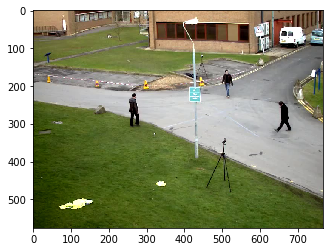

In [4]:
# Open a video with cv2.VideoCapture
vid = cv2.VideoCapture("videos/vtest.mp4")

# Grab a frame
ret, frame = vid.read()

# Video
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [5]:
# Get the properties of video using get() method
print("Frame width: %d" % vid.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Frame height: %d" % vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS: %d" % vid.get(cv2.CAP_PROP_FPS))

Frame width: 768
Frame height: 576
FPS: 10


In [6]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("videos/vtest.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Turn off the axis
        plt.axis('off')
        # Title of the window
        plt.title("Input Stream")
        # Display the frame
        plt.imshow(frame)
        plt.show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print ("Released Video Resource")

Released Video Resource


<Figure size 432x288 with 0 Axes>

In [7]:
# Open a video and Save 
in_fpath = "videos/vtest.mp4"
v_in = cv2.VideoCapture(in_fpath)

# Define the codec and create VideoWriter object
out_fpath = "videos/vtest_flip.mp4"
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
v_out = cv2.VideoWriter(out_fpath, fourcc, 10.0, (768, 576))

while(v_in.isOpened()):
    # Grab a frame
    ret, frame = v_in.read()
    if ret==True:
        # flip the frame horizontally
        frame = cv2.flip(frame, 1)
        # write the flipped frame
        v_out.write(frame)
    else:
        break

# Release everything if job is finished
v_in.release()
v_out.release()

print('Done!')

Done!


In [8]:
open_video_controller("videos/vtest_flip.mp4")

## 2. Tracking

In [10]:
# Set up tracker.
# Instead of MIL, you can also use
# BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
# tracker = cv2.Tracker_create("MIL")
tracker = cv2.TrackerMIL_create()

vid_fpath = "videos/vtest.mp4"
vid = cv2.VideoCapture(vid_fpath)

# Read first frame.
ok, frame = vid.read()
if not ok:
    print ('Cannot read video file')
    sys.exit()

# Define an initial bounding box
bbox = (495, 155, 40, 80)

# Uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

try:
    while True:
            # Read a new frame
            ok, frame = vid.read()
            if not ok:
                break

            # Update tracker
            ok, bbox = tracker.update(frame)

            # Draw bounding box
            if ok:
                p1 = (int(bbox[0]), int(bbox[1]))
                p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
                cv2.rectangle(frame, p1, p2, (0,0,255))

            # Display result
        #     cv2.imshow("Tracking", frame)
            # Display the frame
            plt.imshow(frame)
            plt.show()
            # Display the frame until new frame is available
            clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print ("Released Video Resource")

Released Video Resource
